<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/end-end%20lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('/content/FULL DATASET NOT CHANGED.csv')

In [3]:
df

,month,spi1,earth skin temp,s.hu,r.hu,surface soil wet,sufc.soil moister,temp at 2m range,wind at 2m range,precip,wind 10m,surface.pressure
0,01-01-1981,0.653213,23.43,11.60,67.81,0.55,0.58,18.63,4.81,0.34,6.93,95.22
1,01-02-1981,0.309673,25.94,8.85,48.00,0.34,0.54,22.14,4.37,0.18,6.03,95.13
2,01-03-1981,0.996379,28.69,12.02,54.81,0.38,0.54,20.80,4.84,1.31,6.74,95.04
3,01-04-1981,0.183908,29.98,14.34,60.81,0.46,0.54,18.64,4.91,1.79,7.32,94.87
4,01-05-1981,0.730670,27.30,16.24,74.50,0.58,0.59,14.73,4.25,4.11,5.91,94.74
...,...,...,...,...,...,...,...,...,...,...,...,...
487,01-08-2021,0.440558,24.25,16.42,85.19,0.73,0.72,11.41,5.18,4.69,7.45,94.81
488,01-09-2021,0.653213,24.24,16.78,86.06,0.77,0.74,10.66,5.23,5.36,7.37,94.77
489,01-10-2021,1.362146,23.82,17.27,88.75,0.84,0.81,10.03,4.63,8.82,6.96,94.84
490,01-11-2021,2.208099,22.69,16.72,91.25,0.91,0.90,8.97,4.76,8.57,7.11,94.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              492 non-null    object 
 1   spi1               492 non-null    float64
 2   earth skin temp    492 non-null    float64
 3   s.hu               492 non-null    float64
 4   r.hu               492 non-null    float64
 5   surface soil wet   492 non-null    float64
 6   sufc.soil moister  492 non-null    float64
 7   temp at 2m range   492 non-null    float64
 8   wind at 2m range   492 non-null    float64
 9   precip             492 non-null    float64
 10  wind 10m           492 non-null    float64
 11  surface.pressure   492 non-null    float64
dtypes: float64(11), object(1)
memory usage: 46.2+ KB


In [5]:
df['date'] = pd.to_datetime(df['month'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfb9eb93d0>,
      dtype=object)

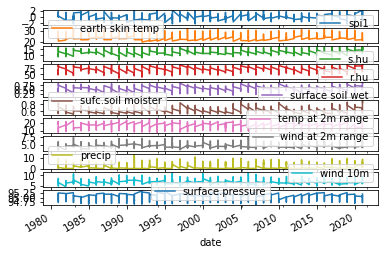

In [6]:
df.set_index('date')[["spi1",	"earth skin temp",	"s.hu",	"r.hu"	,"surface soil wet",	"sufc.soil moister",	"temp at 2m range",	"wind at 2m range",	"precip"	,"wind 10m",	"surface.pressure"]].plot(subplots=True)

In [55]:
df_input=df[["spi1",	"earth skin temp",	"s.hu",	"r.hu"	,"surface soil wet",	"sufc.soil moister",	"temp at 2m range",	"wind at 2m range",	"precip"	,"wind 10m",	"surface.pressure"]]

In [56]:
df_input

,spi1,earth skin temp,s.hu,r.hu,surface soil wet,sufc.soil moister,temp at 2m range,wind at 2m range,precip,wind 10m,surface.pressure
0,0.653213,23.43,11.60,67.81,0.55,0.58,18.63,4.81,0.34,6.93,95.22
1,0.309673,25.94,8.85,48.00,0.34,0.54,22.14,4.37,0.18,6.03,95.13
2,0.996379,28.69,12.02,54.81,0.38,0.54,20.80,4.84,1.31,6.74,95.04
3,0.183908,29.98,14.34,60.81,0.46,0.54,18.64,4.91,1.79,7.32,94.87
4,0.730670,27.30,16.24,74.50,0.58,0.59,14.73,4.25,4.11,5.91,94.74
...,...,...,...,...,...,...,...,...,...,...,...
487,0.440558,24.25,16.42,85.19,0.73,0.72,11.41,5.18,4.69,7.45,94.81
488,0.653213,24.24,16.78,86.06,0.77,0.74,10.66,5.23,5.36,7.37,94.77
489,1.362146,23.82,17.27,88.75,0.84,0.81,10.03,4.63,8.82,6.96,94.84
490,2.208099,22.69,16.72,91.25,0.91,0.90,8.97,4.76,8.57,7.11,94.86


In [57]:
df_input.describe()

,spi1,earth skin temp,s.hu,r.hu,surface soil wet,sufc.soil moister,temp at 2m range,wind at 2m range,precip,wind 10m,surface.pressure
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.025386,25.222317,14.494248,74.604512,0.589126,0.641890,15.292581,4.946687,3.036321,7.060000,94.928435
std,0.949232,2.676717,2.305273,12.959177,0.180307,0.090906,4.227001,0.790598,2.603902,1.153941,0.171201
min,-2.208099,20.010000,6.160000,34.250000,0.120000,0.520000,7.840000,3.240000,0.000000,4.550000,94.600000
25%,-0.653213,23.422500,12.555000,65.105000,0.480000,0.550000,11.540000,4.370000,0.667500,6.270000,94.780000
50%,0.000000,24.305000,15.440000,79.750000,0.620000,0.630000,14.945000,4.820000,2.580000,6.935000,94.890000
75%,0.653213,26.972500,16.300000,85.060000,0.730000,0.710000,18.435000,5.450000,4.847500,7.715000,95.062500
max,2.208099,32.610000,17.520000,91.250000,0.910000,0.900000,25.520000,7.600000,12.990000,11.100000,95.370000


In [59]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

In [60]:
features=data_scaled
target=data_scaled[:,0]

In [109]:
TimeseriesGenerator(features, target, length=5, sampling_rate=1, batch_size=36)[0]

(array([[[0.64791306, 0.27142857, 0.47887324, ..., 0.02617398,
          0.36335878, 0.80519481],
         [0.57012216, 0.47063492, 0.23679577, ..., 0.01385681,
          0.2259542 , 0.68831169],
         [0.72561911, 0.68888889, 0.51584507, ..., 0.10084681,
          0.33435115, 0.57142857],
         [0.54164397, 0.79126984, 0.72007042, ..., 0.13779831,
          0.42290076, 0.35064935],
         [0.66545233, 0.57857143, 0.88732394, ..., 0.31639723,
          0.20763359, 0.18181818]],
 
        [[0.57012216, 0.47063492, 0.23679577, ..., 0.01385681,
          0.2259542 , 0.68831169],
         [0.72561911, 0.68888889, 0.51584507, ..., 0.10084681,
          0.33435115, 0.57142857],
         [0.54164397, 0.79126984, 0.72007042, ..., 0.13779831,
          0.42290076, 0.35064935],
         [0.66545233, 0.57857143, 0.88732394, ..., 0.31639723,
          0.20763359, 0.18181818],
         [0.90196012, 0.28809524, 0.89260563, ..., 0.76982294,
          0.60305344, 0.16883117]],
 
        [[0.72

In [110]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=123, shuffle = False)

In [63]:
x_train.shape

(393, 11)

In [64]:

x_test.shape

(99, 11)

In [111]:
win_length=30
batch_size=32
num_features=11
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [112]:
train_generator[0]

(array([[[0.64791306, 0.27142857, 0.47887324, ..., 0.02617398,
          0.36335878, 0.80519481],
         [0.57012216, 0.47063492, 0.23679577, ..., 0.01385681,
          0.2259542 , 0.68831169],
         [0.72561911, 0.68888889, 0.51584507, ..., 0.10084681,
          0.33435115, 0.57142857],
         ...,
         [0.        , 0.98730159, 0.57570423, ..., 0.00307929,
          0.40916031, 0.37662338],
         [0.09803988, 0.76031746, 0.80633803, ..., 0.05773672,
          0.3389313 , 0.27272727],
         [0.55577269, 0.45396825, 0.87059859, ..., 0.46805235,
          0.93129771, 0.15584416]],
 
        [[0.57012216, 0.47063492, 0.23679577, ..., 0.01385681,
          0.2259542 , 0.68831169],
         [0.72561911, 0.68888889, 0.51584507, ..., 0.10084681,
          0.33435115, 0.57142857],
         [0.54164397, 0.79126984, 0.72007042, ..., 0.13779831,
          0.42290076, 0.35064935],
         ...,
         [0.09803988, 0.76031746, 0.80633803, ..., 0.05773672,
          0.3389313 , 0.

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 128)           71680     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 30, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           131584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 30, 128)           0         
                                                                 
 dropout_10 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [115]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


10/10 [==============================] - 8s 242ms/step - loss: 0.1039 - mean_absolute_error: 0.2490 - val_loss: 0.0611 - val_mean_absolute_error: 0.2005
Epoch 2/50
10/10 [==============================] - 1s 107ms/step - loss: 0.0519 - mean_absolute_error: 0.1799 - val_loss: 0.0558 - val_mean_absolute_error: 0.1909
Epoch 3/50
10/10 [==============================] - 1s 108ms/step - loss: 0.0480 - mean_absolute_error: 0.1777 - val_loss: 0.0521 - val_mean_absolute_error: 0.1844
Epoch 4/50
10/10 [==============================] - 1s 108ms/step - loss: 0.0456 - mean_absolute_error: 0.1728 - val_loss: 0.0514 - val_mean_absolute_error: 0.1832
Epoch 5/50
10/10 [==============================] - 1s 107ms/step - loss: 0.0518 - mean_absolute_error: 0.1830 - val_loss: 0.0530 - val_mean_absolute_error: 0.1855
Epoch 6/50
10/10 [==============================] - 1s 108ms/step - loss: 0.0487 - mean_absolute_error: 0.1754 - val_loss: 0.0527 - val_mean_absolute_error: 0.1850


In [116]:
model.evaluate_generator(test_generator, verbose=0)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0526912659406662, 0.1849597990512848]

In [117]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [72]:
predictions.shape[0]

75

In [37]:
predictions

array([[0.3347515 ],
       [0.33155185],
       [0.33525825],
       [0.34646812],
       [0.36340064],
       [0.37687752],
       [0.38274553],
       [0.37598726],
       [0.359596  ],
       [0.33966994],
       [0.32148442],
       [0.30833912],
       [0.30265567],
       [0.30420202],
       [0.3129804 ],
       [0.32544205],
       [0.33989105],
       [0.35093376],
       [0.35488805],
       [0.34949458],
       [0.33775437],
       [0.3239029 ],
       [0.31342733],
       [0.30619544],
       [0.30308354],
       [0.3087567 ],
       [0.32066688],
       [0.34144068],
       [0.36575246],
       [0.3872102 ],
       [0.39881048],
       [0.39701492],
       [0.38580227],
       [0.3700543 ],
       [0.35365704],
       [0.34172532],
       [0.33727175],
       [0.34040067],
       [0.3526775 ],
       [0.37026346],
       [0.39054388],
       [0.40581274],
       [0.40825582],
       [0.39700353],
       [0.37683937],
       [0.35267496],
       [0.33065915],
       [0.312

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
x_test[:,0:][win_length:]

In [119]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

In [120]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

In [121]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:

df_final.count()

In [122]:
df_final['App_Pred']=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
df_final

,spi1,earth skin temp,s.hu,r.hu,surface soil wet,sufc.soil moister,temp at 2m range,wind at 2m range,precip,wind 10m,surface.pressure,App_Pred
374,-0.440558,30.58,11.78,51.00,0.20,0.53,19.85,4.84,0.25,7.18,94.95,0.044863
375,0.900782,29.82,14.95,64.44,0.41,0.55,17.07,4.01,2.96,5.94,94.84,0.033637
376,-1.221783,26.93,16.78,76.81,0.57,0.59,15.57,3.81,1.40,5.36,94.77,0.016567
377,-0.996379,25.18,16.11,80.94,0.60,0.60,13.77,4.97,4.16,6.81,94.76,-0.004636
378,-1.536101,25.13,16.24,81.88,0.62,0.63,10.91,5.67,2.28,7.73,94.69,-0.027414
...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.440558,24.25,16.42,85.19,0.73,0.72,11.41,5.18,4.69,7.45,94.81,0.091713
488,0.653213,24.24,16.78,86.06,0.77,0.74,10.66,5.23,5.36,7.37,94.77,0.092108
489,1.362146,23.82,17.27,88.75,0.84,0.81,10.03,4.63,8.82,6.96,94.84,0.093852
490,2.208099,22.69,16.72,91.25,0.91,0.90,8.97,4.76,8.57,7.11,94.86,0.099024


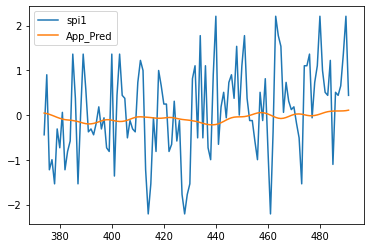

In [124]:
df_final[['spi1','App_Pred']].plot()